In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#load dataset
file_path = r'C:\Users\Vedika Pawar\OneDrive\Desktop\Datasetforanalysis\crypto_trends_insights_2024.csv'

df = pd.read_csv(file_path)

df.head()

,Name,Symbol,Price,1h %,24h %,7d %,60d %,90d %,YTD %,Market Cap,Volume (24h),Volume Change (24h),Volume Change (30d),Circulating Supply,Total Supply,Max Supply,Num Market Pairs
0,Bitcoin,BTC,96183.612710,-0.582452,-1.406937,-6.098029,43.357862,50.760758,NaN,1.904380e+12,5.128441e+10,-46.4837,NaN,1.979945e+07,1.979945e+07,2.100000e+07,11849
1,Ethereum,ETH,3313.788191,-0.906492,-4.726532,-14.958048,26.799836,24.709903,NaN,3.991630e+11,3.126633e+10,-48.6213,NaN,1.204553e+08,1.204553e+08,NaN,9712
2,Tether USDt,USDT,0.999253,-0.020326,-0.027455,-0.035466,-0.002103,-0.076709,NaN,1.397680e+11,1.421390e+11,-41.9306,NaN,1.398730e+11,1.434400e+11,NaN,109588
3,XRP,XRP,2.188454,-2.185932,-5.350521,-10.121365,312.945320,270.081243,NaN,1.252940e+11,1.424509e+10,-45.1770,NaN,5.725238e+10,9.998681e+10,1.000000e+11,1485
4,BNB,BNB,651.685277,-1.337123,-5.012758,-8.951213,10.758367,9.719003,NaN,9.384770e+10,2.075789e+09,-31.4686,NaN,1.440077e+08,1.440077e+08,NaN,2315


In [3]:
#Let's check for any missing values and handle them appropriately.
df.isnull().sum()

Name                       0
Symbol                     0
Price                      0
1h %                       0
24h %                      0
7d %                       0
60d %                      0
90d %                      0
YTD %                  10422
Market Cap                 0
Volume (24h)               0
Volume Change (24h)        0
Volume Change (30d)    10422
Circulating Supply         0
Total Supply               0
Max Supply              3229
Num Market Pairs           0
dtype: int64

In [5]:
#We will fill missing values for columns like 'YTD %', 'Volume Change (30d)', and 'Max Supply' with zeros, assuming that missing values indicate no change or no limit.
df.fillna(0,inplace=True)

df.isnull().sum()

Name                   0
Symbol                 0
Price                  0
1h %                   0
24h %                  0
7d %                   0
60d %                  0
90d %                  0
YTD %                  0
Market Cap             0
Volume (24h)           0
Volume Change (24h)    0
Volume Change (30d)    0
Circulating Supply     0
Total Supply           0
Max Supply             0
Num Market Pairs       0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

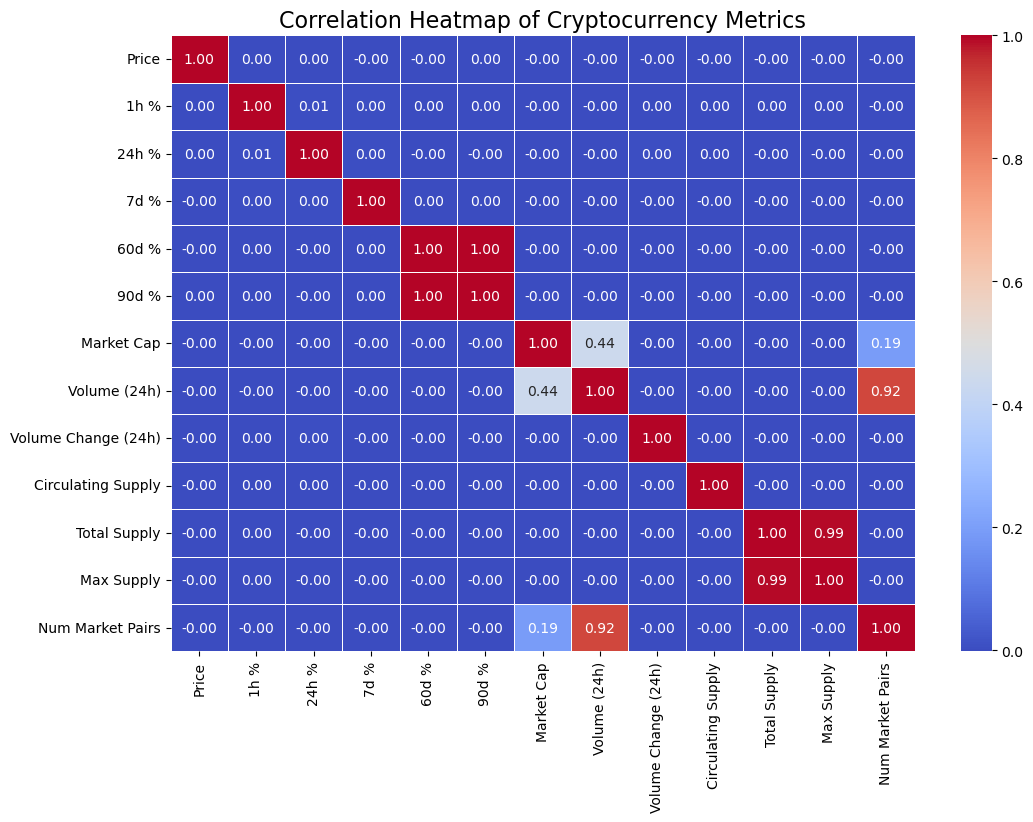

In [7]:
#Correlation Analysis
#Let's explore the correlation between different numerical features.
number_df = df.select_dtypes(include=[np.number])  #This code selects only numeric columns

number_df = number_df.drop(columns=['YTD %', 'Volume Change (30d)']) #Remove unwanted columns from map

correlation_matrix = number_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Cryptocurrency Metrics", fontsize=16)
plt.show


Significant Correlations:

Market Cap vs. Volume (24h): Correlation of 0.44, indicating a moderate positive relationship. It suggests that higher market caps tend to be associated with increased trading activity within a 24-hour period. 

Volume (24h) vs. Volume Change (24h): Correlation of 0.92, indicating a strong positive relationship. It indicates that changes in 24-hour volume closely mirror the actual trading volume, reflecting consistent activity trends.

Total Supply vs. Max Supply: Correlation of 0.99, suggesting these metrics are almost the same for most assets.


                  Name Symbol    Market Cap Market Cap Classification
0              Bitcoin    BTC  1.904380e+12                  Trillion
1             Ethereum    ETH  3.991630e+11                   Billion
2          Tether USDt   USDT  1.397680e+11                   Billion
3                  XRP    XRP  1.252940e+11                   Billion
4                  BNB    BNB  9.384770e+10                   Billion
5               Solana    SOL  8.598282e+10                   Billion
6             Dogecoin   DOGE  4.519455e+10                   Billion
7                 USDC   USDC  4.293281e+10                   Billion
10248  Lido Staked ETH  stETH  3.225819e+10                   Billion
8              Cardano    ADA  3.080950e+10                   Billion


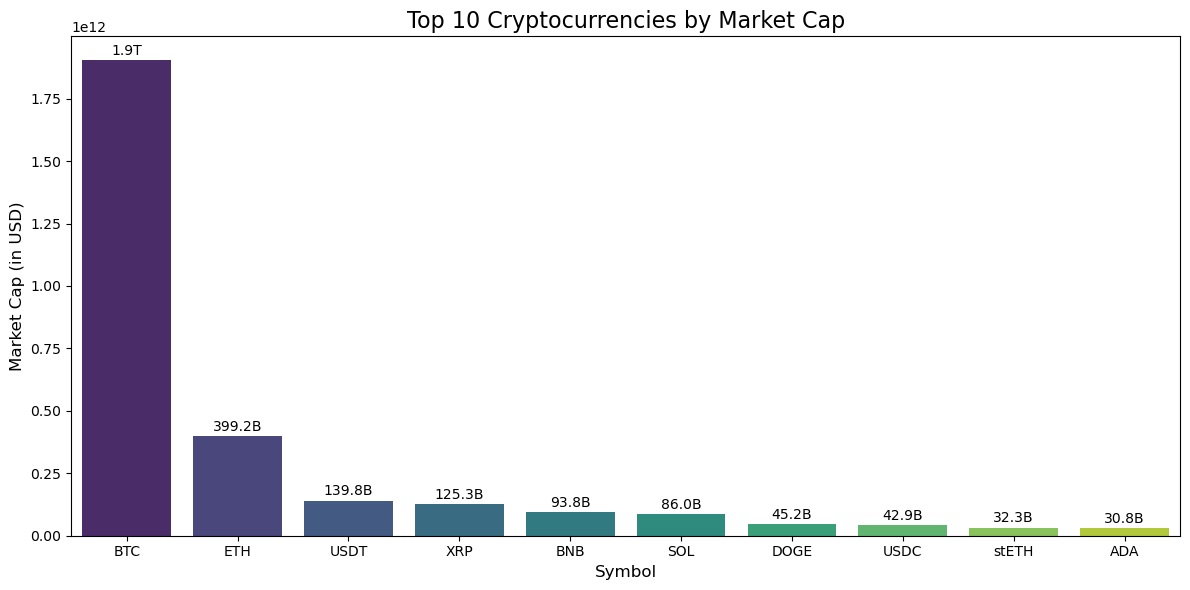

In [9]:
#Top Cryptocurrencies by Market Cap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for Top 10 Market Cap, classify market cap, and convert it to readable format
MarketCapData = df.nlargest(10, "Market Cap")[["Name", "Symbol", "Market Cap"]]
MarketCapData['Market Cap Classification'] = MarketCapData['Market Cap'].apply(
    lambda x: "Trillion" if x >= 1e12 else ("Billion" if x >= 1e9 else ("Million" if x >= 1e6 else "Less than Million"))
)
MarketCapData['Market Cap (Readable)'] = MarketCapData['Market Cap'].apply(
    lambda x: f"{x / 1e12:.1f}T" if x >= 1e12 else (f"{x / 1e9:.1f}B" if x >= 1e9 else f"{x / 1e6:.1f}M"))
  
# Display the table
print(MarketCapData[['Name', 'Symbol','Market Cap','Market Cap Classification']])

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Symbol", y="Market Cap", data=MarketCapData, palette="viridis")

# Adding data labels inside the bars
for bar, label in zip(ax.patches, MarketCapData['Market Cap (Readable)']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1e10, label, ha="center", va="bottom", fontsize=10, color="black")

# Customizing the chart
plt.title("Top 10 Cryptocurrencies by Market Cap", fontsize=16)
plt.ylabel("Market Cap (in USD)", fontsize=12)
plt.xlabel("Symbol", fontsize=12)
plt.tight_layout()

# Display the chart
plt.show()


                 Name Symbol  Volume (24h) Volume 24h Classification
2         Tether USDt   USDT  1.421390e+11                   Billion
0             Bitcoin    BTC  5.128441e+10                   Billion
1            Ethereum    ETH  3.126633e+10                   Billion
3                 XRP    XRP  1.424509e+10                   Billion
7                USDC   USDC  7.195026e+09                   Billion
6            Dogecoin   DOGE  6.590880e+09                   Billion
63  First Digital USD  FDUSD  5.780146e+09                   Billion
5              Solana    SOL  5.545510e+09                   Billion
23               Pepe   PEPE  3.015708e+09                   Billion
13                Sui    SUI  2.942807e+09                   Billion


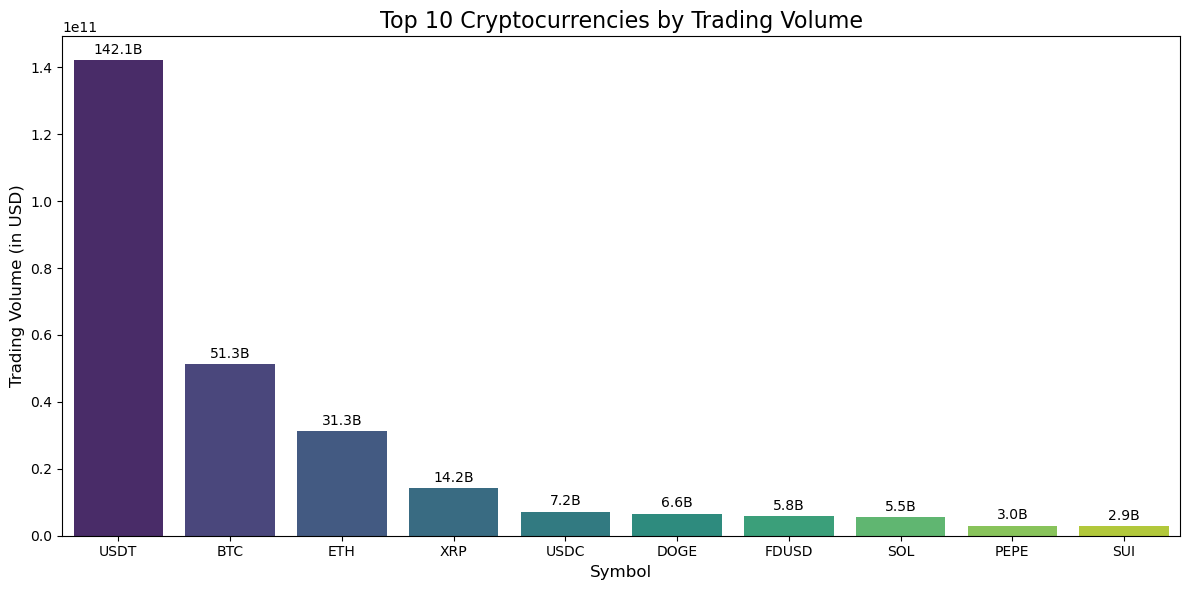

In [11]:
#Top Cryptocurrencies by Trading Volume
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for Top 10 Market Cap, classify market cap, and convert it to readable format
Volume24hData = df.nlargest(10, "Volume (24h)")[["Name", "Symbol", "Volume (24h)"]]
Volume24hData['Volume 24h Classification'] = Volume24hData['Volume (24h)'].apply(
    lambda x: "Trillion" if x >= 1e12 else ("Billion" if x >= 1e9 else ("Million" if x >= 1e6 else "Less than Million"))
)
Volume24hData['Volume 24h (Readable)'] = Volume24hData['Volume (24h)'].apply(
    lambda x: f"{x / 1e12:.1f}T" if x >= 1e12 else (f"{x / 1e9:.1f}B" if x >= 1e9 else f"{x / 1e6:.1f}M"))
  
# Display the table
print(Volume24hData[['Name', 'Symbol','Volume (24h)','Volume 24h Classification']])

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Symbol", y="Volume (24h)", data=Volume24hData, palette="viridis")

# Adding data labels inside the bars
for bar, label in zip(ax.patches, Volume24hData['Volume 24h (Readable)']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1e09, label, ha="center", va="bottom", fontsize=10, color="black")

# Customizing the chart
plt.title("Top 10 Cryptocurrencies by Trading Volume", fontsize=16)
plt.ylabel("Trading Volume (in USD)", fontsize=12)
plt.xlabel("Symbol", fontsize=12)
plt.tight_layout()

# Display the chart
plt.show()


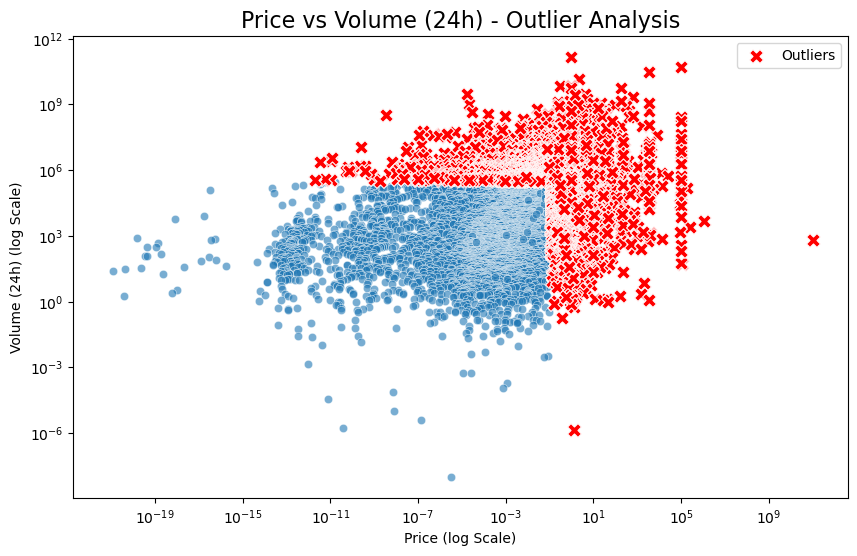

In [53]:
#Price vs 24 hours volume outlier analysis
import numpy as np

# Identify outliers based on IQR (Interquartile Range)
Q1 = df[['Price', 'Volume (24h)']].quantile(0.25)
Q3 = df[['Price', 'Volume (24h)']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['Price', 'Volume (24h)']] < (Q1 - 1.5 * IQR)) | (df[['Price', 'Volume (24h)']] > (Q3 + 1.5 * IQR)))

# Plot the scatter plot, highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Price", y="Volume (24h)", alpha=0.6)

# Highlight outliers in red
sns.scatterplot(data=df[outliers['Price'] | outliers['Volume (24h)']], x="Price", y="Volume (24h)", color="red", label="Outliers", s=100, marker='X')

plt.xscale("log")
plt.yscale("log")
plt.title("Price vs Volume (24h) - Outlier Analysis", fontsize=16)
plt.xlabel("Price (log Scale)")
plt.ylabel("Volume (24h) (log Scale)")
plt.legend()
plt.show()


Observations:

Main Cluster (Blue Circles): Represents the majority of data points with lower prices and volumes, densely packed towards the lower-left corner of the plot.

Outliers (Red Crosses): Indicate cryptocurrencies with significantly higher prices and volumes, spread out more towards the upper right of the plot.

Conclusions:
Price and Volume Distribution: The main cluster is characterized by cryptocurrencies with lower and more consistent price and volume ranges.

Presence of Outliers: There are notable outliers with much higher price and volume, suggesting extreme variations within the dataset.

In [55]:
#Get a list of Cluster and Outliers currencies in excel
import pandas as pd

# Define the outlier detection function using IQR
def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Apply the IQR method for both Price and Volume (24h)
price_outliers = detect_outliers(df, 'Price')
volume_outliers = detect_outliers(df, 'Volume (24h)')

# Define cluster conditions (Price between 1e-6 and 10, Volume greater than 1e3)
cluster_conditions = (df['Price'] > 1e-6) & (df['Price'] < 10) & (df['Volume (24h)'] > 1e3)

# Filter data for clusters
cluster_currencies = df[cluster_conditions]

# Filter data for outliers based on IQR for both Price and Volume (24h)
outlier_currencies = df[price_outliers | volume_outliers]

# Save the results to an Excel file
output_file = r'C:\Users\Vedika Pawar\OneDrive\Documents\OutputFile\cluster_and_outliers.xlsx'
with pd.ExcelWriter(output_file) as writer:
    cluster_currencies.to_excel(writer, sheet_name='Cluster Currencies', index=False)
    outlier_currencies.to_excel(writer, sheet_name='Outlier Currencies', index=False)

print(f"Results saved to {output_file}")


Results saved to C:\Users\Vedika Pawar\OneDrive\Documents\OutputFile\cluster_and_outliers.xlsx



Linear Regression Results:
Mean Squared Error: 0.7710
R-squared: 0.5685


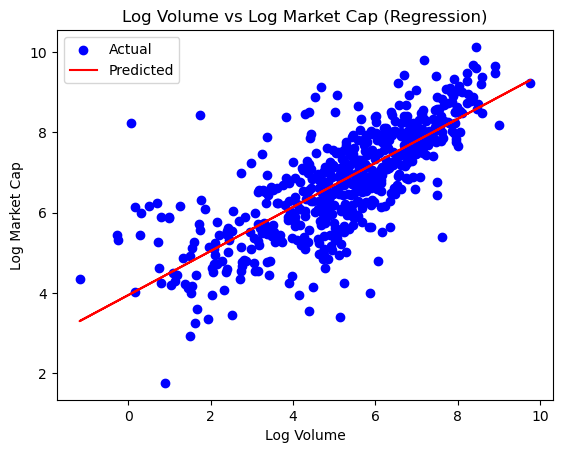

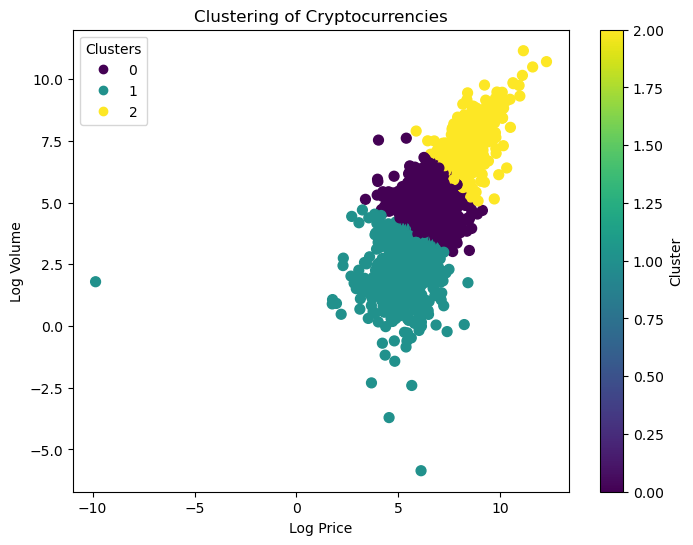

Cluster 0:
 - Average Price: 3591415.78
 - Average Volume: 126902.62
 - Count: 1415
Cluster 1:
 - Average Price: 169882.64
 - Average Volume: 232.35
 - Count: 623
Cluster 2:
 - Average Price: 161542664.80
 - Average Volume: 15476651.47
 - Count: 863
Analysis saved to C:\Users\Vedika Pawar\OneDrive\Documents\OutputFile\crypto_price_volume_analysis.xlsx


In [71]:
#Build a model with regression and clustering for predicting future market behavior based on the relationship between Market Cap and trading volume.

from IPython.display import display, HTML

display(HTML("<h1 style='text-align:center;'>Market Cap vs Trading Volume</h1>"))

print("")


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
#file_path = 'crypto_trends_insights_2024.csv'  # Replace with your file path
#data = pd.read_csv(file_path)

# Preprocessing: Ensure relevant columns exist and drop NaNs
datatrf = df[['Market Cap', 'Volume (24h)']].dropna()

# Log-transform the data to normalize the scale
datatrf['Log_MarketCap'] = np.log10(datatrf['Market Cap'].replace(0, np.nan))
datatrf['Log_Volume'] = np.log10(datatrf['Volume (24h)'].replace(0, np.nan))
datatrf = datatrf.dropna()  # Remove rows where log-transform introduced NaNs

# Step 1: Predictive Model - Linear Regression
# Define features (X) and target (y)
X = datatrf[['Log_Volume']]
y = datatrf['Log_MarketCap']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
print("Linear Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R-squared: {r2_score(y_test, y_pred):.4f}")

# Visualize regression
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Log Volume vs Log Market Cap (Regression)')
plt.xlabel('Log Volume')
plt.ylabel('Log Market Cap')
plt.legend()
plt.show()

# Step 2: Clustering for Market Insights
# Use KMeans to find clusters
kmeans = KMeans(n_clusters=3, random_state=42)
datatrf['Cluster'] = kmeans.fit_predict(datatrf[['Log_MarketCap', 'Log_Volume']])

# Visualize clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(datatrf['Log_MarketCap'], datatrf['Log_Volume'], c=datatrf['Cluster'], cmap='viridis', s=50)
plt.title('Clustering of Cryptocurrencies')
plt.xlabel('Log Price')
plt.ylabel('Log Volume')
# Adding legend with the cluster labels
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.colorbar(label='Cluster')
plt.show()

# Step 3: Insights from Clustering
for cluster_id in sorted(datatrf['Cluster'].unique()):
    cluster_data = datatrf[datatrf['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(f" - Average Price: {10**cluster_data['Log_MarketCap'].mean():.2f}")
    print(f" - Average Volume: {10**cluster_data['Log_Volume'].mean():.2f}")
    print(f" - Count: {len(cluster_data)}")

# Save results for further analysis
output_file = r'C:\Users\Vedika Pawar\OneDrive\Documents\OutputFile\crypto_price_volume_analysis.xlsx'
datatrf.to_excel(output_file, index=False)
print(f"Analysis saved to {output_file}")

The regression analysis demonstrates a strong correlation between trading volume and market cap, while the clustering reveals distinct groupings of cryptocurrencies based on their pricing and trading activity. 

summary of the clusters from the chart:

Cluster 0 (Purple Dots):

Log Price: Lower range

Log Volume: Lower range

Characteristics: These cryptocurrencies have lower prices and lower trading volumes, suggesting they might be less popular or new to the market.

Cluster 1 (Teal Dots):

Log Price: Moderate range

Log Volume: Moderate range

Characteristics: These cryptocurrencies have moderate prices and trading volumes, indicating a stable presence in the market with steady activity.

Cluster 2 (Yellow Dots):

Log Price: Higher range

Log Volume: Higher range

Characteristics: These cryptocurrencies are on the higher end of both price and volume scales, showing high popularity and active trading.


Linear Regression Results:
Mean Squared Error: 0.1337
R-squared: 0.9799


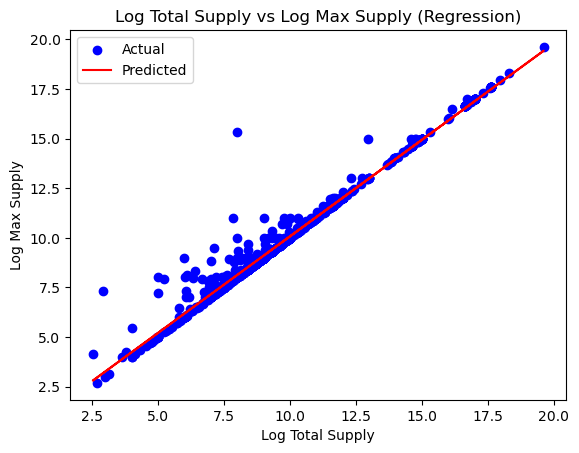

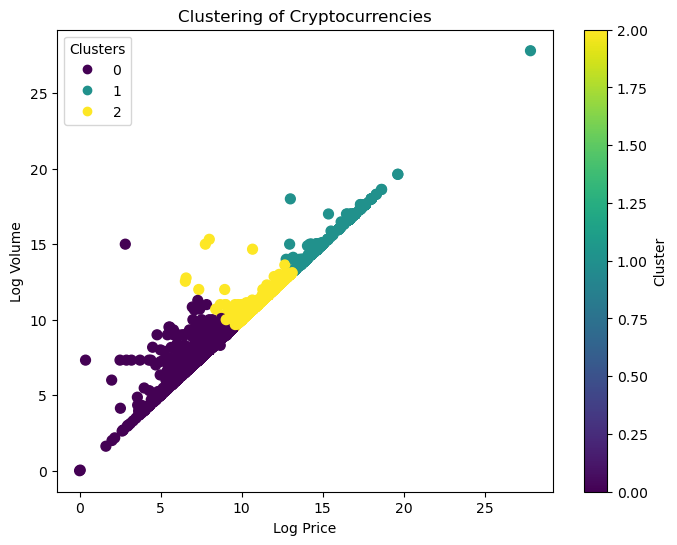

Cluster 0:
 - Average Total Supply: 155362548.29
 - Average Max Supply: 194480567.79
 - Count: 4611
Cluster 1:
 - Average Total Supply: 3720668209396650.00
 - Average Max Supply: 4065875610289292.50
 - Count: 711
Cluster 2:
 - Average Total Supply: 53309312314.84
 - Average Max Supply: 63921310907.29
 - Count: 1453
Analysis saved to C:\Users\Vedika Pawar\OneDrive\Documents\OutputFile\crypto_price_volume_analysis.xlsx


In [75]:
#Build a model with regression and clustering for predicting future market behavior based on the relationship between Total Supply and Max Supply.

from IPython.display import display, HTML

display(HTML("<h1 style='text-align:center;'>Total Supply vs Max Supply</h1>"))

print("")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
#file_path = 'crypto_trends_insights_2024.csv'  # Replace with your file path
#data = pd.read_csv(file_path)

# Preprocessing: Ensure relevant columns exist and drop NaNs
datatrf = df[['Total Supply', 'Max Supply']].dropna()

# Log-transform the data to normalize the scale
datatrf['Log_TotalSupply'] = np.log10(datatrf['Total Supply'].replace(0, np.nan))
datatrf['Log_MaxSupply'] = np.log10(datatrf['Max Supply'].replace(0, np.nan))
datatrf = datatrf.dropna()  # Remove rows where log-transform introduced NaNs

# Step 1: Predictive Model - Linear Regression
# Define features (X) and target (y)
X = datatrf[['Log_TotalSupply']]
y = datatrf['Log_MaxSupply']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
print("Linear Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R-squared: {r2_score(y_test, y_pred):.4f}")

# Visualize regression
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Log Total Supply vs Log Max Supply (Regression)')
plt.xlabel('Log Total Supply')
plt.ylabel('Log Max Supply')
plt.legend()
plt.show()

# Step 2: Clustering for Market Insights
# Use KMeans to find clusters
kmeans = KMeans(n_clusters=3, random_state=42)
datatrf['Cluster'] = kmeans.fit_predict(datatrf[['Log_TotalSupply', 'Log_MaxSupply']])

# Visualize clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(datatrf['Log_TotalSupply'], datatrf['Log_MaxSupply'], c=datatrf['Cluster'], cmap='viridis', s=50)
plt.title('Clustering of Cryptocurrencies')
plt.xlabel('Log Price')
plt.ylabel('Log Volume')
# Adding legend with the cluster labels
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.colorbar(label='Cluster')
plt.show()

# Step 3: Insights from Clustering
for cluster_id in sorted(datatrf['Cluster'].unique()):
    cluster_data = datatrf[datatrf['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(f" - Average Total Supply: {10**cluster_data['Log_TotalSupply'].mean():.2f}")
    print(f" - Average Max Supply: {10**cluster_data['Log_MaxSupply'].mean():.2f}")
    print(f" - Count: {len(cluster_data)}")

# Save results for further analysis
output_file = r'C:\Users\Vedika Pawar\OneDrive\Documents\OutputFile\crypto_price_volume_analysis.xlsx'
datatrf.to_excel(output_file, index=False)
print(f"Analysis saved to {output_file}")

The regression plot demonstrates a strong linear relationship between supply-related metrics, suggesting predictable behavior in terms of supply dynamics. Meanwhile, the clustering plot effectively segments cryptocurrencies into distinct market categories based on price and volume.

The conclusions about the clusters:

Cluster 0 (Purple Dots):

Log Price: Lower range

Log Volume: Lower range

Characteristics: These cryptocurrencies have lower prices and lower trading volumes, suggesting they might be less popular or new to the market.

Cluster 1 (Teal Dots):

Log Price: Higher range

Log Volume: Higher range

Characteristics: These cryptocurrencies have higher prices and higher trading volumes, indicating they are popular and actively traded.

Cluster 2 (Yellow Dots):

Log Price: Intermediate range

Log Volume: Intermediate range

Characteristics: These cryptocurrencies fall in the middle range for both prices and trading volumes, showing moderate popularity and activity.

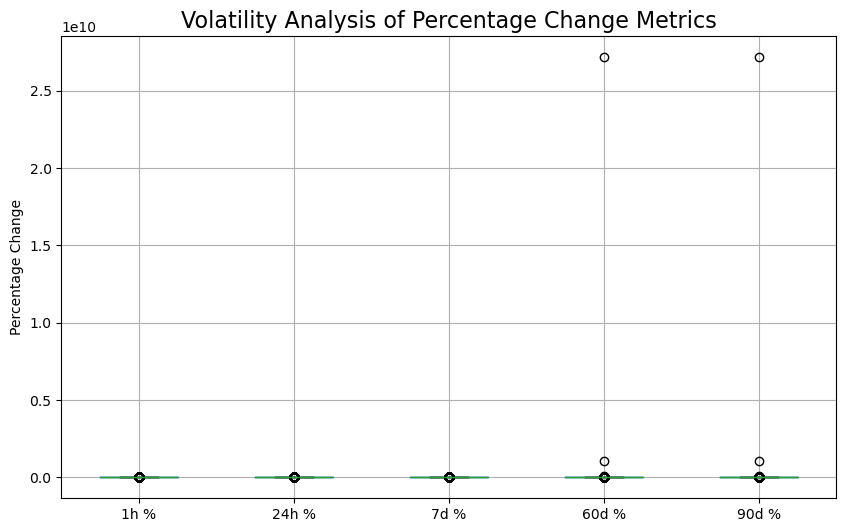

In [15]:
#Volatility Analysis (Percentage Change Metrics)
volatility_columns = ["1h %", "24h %", "7d %", "60d %", "90d %"]
df[volatility_columns].boxplot(figsize=(10, 6))
plt.title("Volatility Analysis of Percentage Change Metrics", fontsize=16)
plt.ylabel("Percentage Change")
plt.show()


Conclusion:
1. Low Short-Term Volatility:

The short-term timeframes (1 hour %, 24 hours %, 7 days %) show minimal percentage changes, indicating stable behavior in the short term.

2. Higher Long-Term Volatility:

The increased spread and presence of outliers in the 60 days % and 90 days % timeframes highlight greater volatility over longer periods. This could be due to macroeconomic factors, market events, or fundamental shifts impacting the data.

3. Outliers in Longer Timeframes:

The outliers in 60 days % and 90 days % suggest that extreme changes occurred during these periods, likely influenced by significant market movements or anomalies.

Final Conclusion:

The data suggests stability in the short term but high risk and variability in the long term. For decision-making:
Short-term strategies may be safer and more predictable.
Long-term strategies carry higher risk but also potential for significant returns, depending on the nature of the outliers.

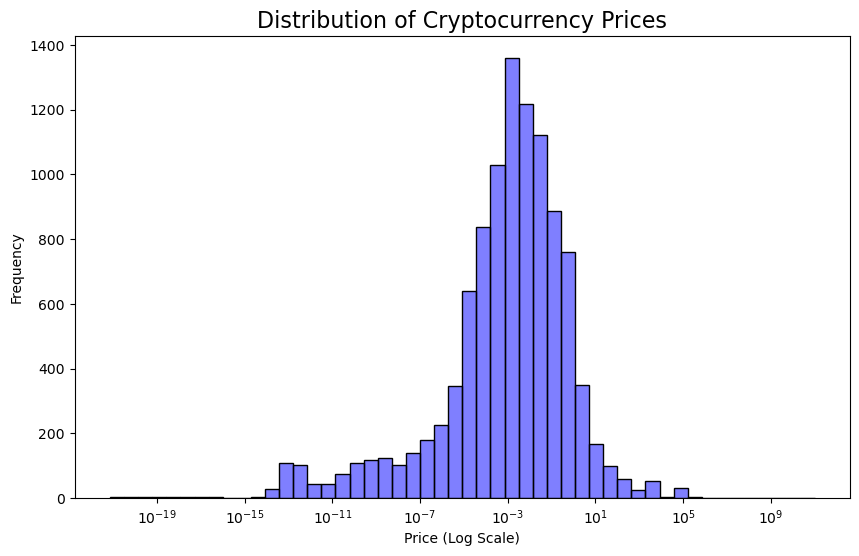

In [51]:
#Distribution Analysis of Cryptocurrency Prices
plt.figure(figsize=(10, 6))
sns.histplot(df["Price"], bins=50, kde=True, log_scale=True, color="blue")
plt.title("Distribution of Cryptocurrency Prices", fontsize=16)
plt.xlabel("Price (Log Scale)")
plt.ylabel("Frequency")
plt.show()

Observation:
Peak Frequency: The most common price range for cryptocurrencies centers around 10^-3 on the logarithmic scale. This range has the highest frequency, indicating that a significant number of cryptocurrencies are priced in this range.

Symmetrical Distribution: The frequency of prices decreases symmetrically as you move away from the peak price range (10^-3) in both directions. This suggests that extremely low and extremely high prices are less common.

Logarithmic Scale Insight: Using a logarithmic scale allows us to see the distribution of prices more clearly, especially when prices span multiple orders of magnitude.

Conclusion: The majority of cryptocurrencies tend to cluster around the 10^-3 price range on a logarithmic scale, with fewer cryptocurrencies having extremely low or high prices. This insight can be useful for understanding the typical price range and variability within the cryptocurrency market.

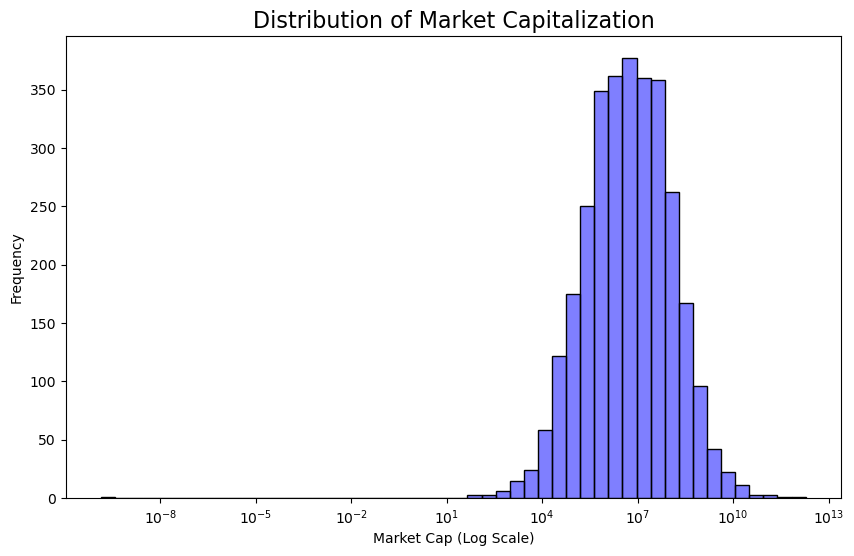

In [47]:
#Distribution Analysis of Market Cap
plt.figure(figsize=(10, 6))
sns.histplot(df["Market Cap"], bins=50, kde=True, log_scale=True, color="blue")
plt.title("Distribution of Market Capitalization", fontsize=16)
plt.xlabel("Market Cap (Log Scale)")
plt.ylabel("Frequency")
plt.show()

Observation:
Concentration Range: The bulk of market capitalizations are concentrated between 10^4 and 10^10 on the logarithmic scale, indicating that most assets fall within this range.

Peak Frequency: The highest frequency of market capitalizations is observed around 10^7, suggesting a common size for market caps in this dataset.

Distribution: The frequency decreases as market capitalizations

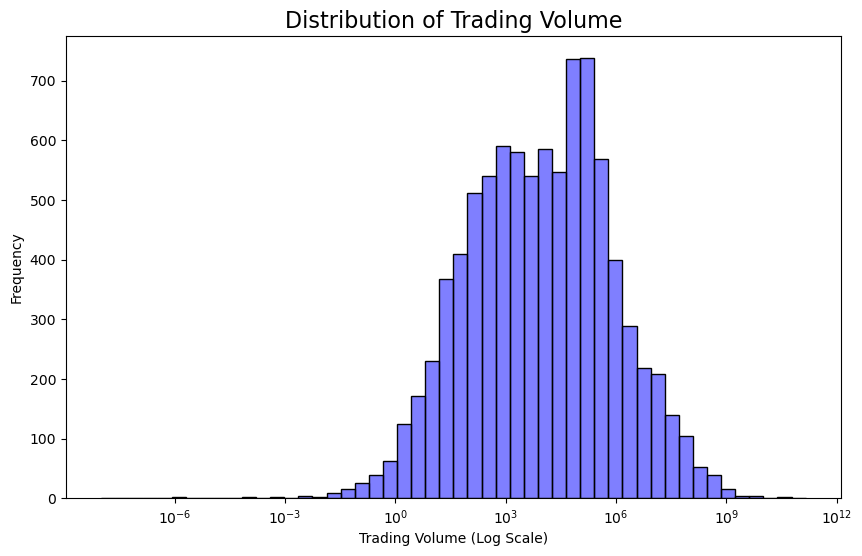

In [21]:
#Distribution Analysis of Trading Volume
plt.figure(figsize=(10, 6))
sns.histplot(df["Volume (24h)"], bins=50, kde=True, log_scale=True, color="blue")
plt.title("Distribution of Trading Volume", fontsize=16)
plt.xlabel("Trading Volume (Log Scale)")
plt.ylabel("Frequency")
plt.show()

Central Tendency: The histogram shows that the majority of trading volumes are concentrated around a central value, specifically around the 10^5 
mark on the logarithmic scale.

Symmetry: The distribution appears to be approximately symmetric and bell-shaped, which resembles a normal distribution.

Frequency Peaks: The highest frequency of trading volumes is near the central value, with fewer occurrences on both the lower and higher ends of the spectrum.

Logarithmic Scale: The x-axis uses a logarithmic scale, which is commonly used to depict data that spans several orders of magnitude. This helps in visualizing the broad range of trading volumes more effectively.

In summary, the chart suggests that most trading activities cluster around a typical volume, with very high and very low trading volumes being less common. This can be useful for understanding market behavior and liquidity patterns.

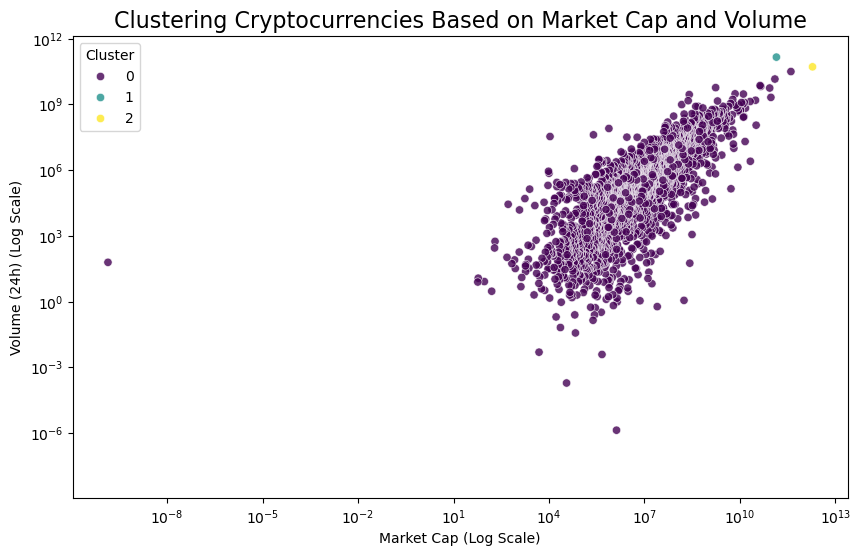

In [23]:
#Clustering Based on Market Cap and Volume
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns for clustering
clustering_data = df[["Market Cap", "Volume (24h)"]].dropna()
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_scaled)
clustering_data["Cluster"] = kmeans.labels_

# Visualize clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=clustering_data["Market Cap"], 
    y=clustering_data["Volume (24h)"], 
    hue=clustering_data["Cluster"], 
    palette="viridis", alpha=0.8
)
plt.xscale("log")
plt.yscale("log")
plt.title("Clustering Cryptocurrencies Based on Market Cap and Volume", fontsize=16)
plt.xlabel("Market Cap (Log Scale)")
plt.ylabel("Volume (24h) (Log Scale)")
plt.legend(title="Cluster")
plt.show()


Conclusions:
1. Market Trends:

The relationship between market cap and volume is evident, with larger-cap cryptocurrencies being more actively traded.
This trend suggests that market cap can serve as a reasonable predictor of trading activity.

2. Clustering Insights:

Cluster 0 likely consists of niche or lower-tier cryptocurrencies, which may have less market visibility or utility.
Cluster 1 contains moderately well-established cryptocurrencies, while Cluster 2 likely includes major players driving the market.

3. Applications:

This clustering analysis helps in market segmentation:
Investors can focus on specific clusters based on their risk tolerance and investment strategies.
Cluster 2 assets might be considered stable or leading options, while Cluster 0 may include speculative or emerging projects.

--------------------------------------------------------------------------------------------------------------------------------------

Observation of Clusters

Cluster 0 (Purple):

Market Cap: Lower range (10^-8 to 10^5)

Volume: Lower range (10^-6 to 10^7)

Characteristics: This cluster contains the majority of the data points, indicating that most cryptocurrencies have relatively lower market caps and trading volumes. These could be newer or less prominent cryptocurrencies.

Cluster 1 (Cyan):

Market Cap: Higher range (10^7 to 10^13)

Volume: Higher range (10^9 to 10^12)

Characteristics: This cluster contains fewer data points and represents cryptocurrencies with higher market caps and trading volumes. These are likely to be well-known and actively traded cryptocurrencies.

Cluster 2 (Yellow):

Market Cap: Higher range (10^6 to 10^12)

Volume: Higher range (10^8 to 10^11)

Characteristics: Similar to Cluster 1, this cluster also contains fewer data points and represents prominent cryptocurrencies with high market caps and trading volumes. They may also be well-established and widely traded.

Predictive Modeling Let's attempt to build a predictive model to forecast the price of cryptocurrencies based on other features. We'll use Linear Regression, Decision Tree and Random Forest with outliers and without outliers.

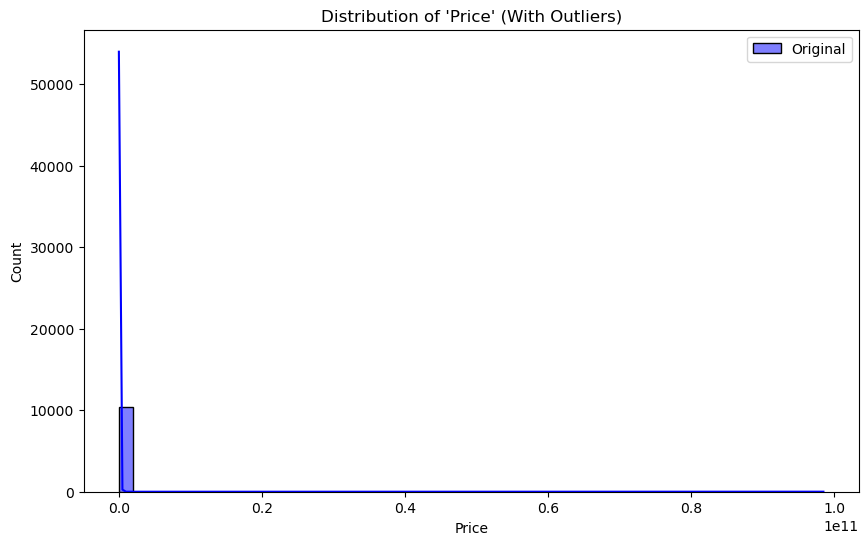

-------Calculated the range of your target variables-------

Target Range: 25.3135321852367

-------Compared the MSE to the square of the range-------

Target Range: 25.3135321852367
Target Range Squared: 640.7749116930142

-------Print LinearRegression MSE and R2-------

LinearRegression MSE: 3.0759005241626896, R²: -1.019175034854761

-------Print Decision Tree MSE and R2-------

Decision Tree MSE: 4.655310273575486e+18, R²: -0.0004798508475911678

-------Print Random Forest MSE and R2-------

Random Forest MSE: 4.655310273516234e+18, R²: -0.00047985083485713176

-------Compared Target with LinearRegression MSE-------

LR_MSE is within an acceptable range.

-------Compared Target with Decision Tree MSE-------

DT_MSE is extremely large compared to the target variable range.

-------Compared Target with Random Forest MSE-------

RF_MSE is extremely large compared to the target variable range.


In [29]:
#Predict the model with outliers
from IPython.display import display, HTML

display(HTML("<h1 style='text-align:center;'>Predicted the model with outliers</h1>"))

print("")

from sklearn.model_selection import train_test_split 
#Splits the dataset into training and testing subsets.

from sklearn.linear_model import LinearRegression
#A linear regression model from Scikit-learn to predict continuous values.

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
#Evaluates the model's error by calculating the average squared difference between predicted and actual values.
#Measures the proportion of variance in the target variable that the model explains (also known as the coefficient of determination).

from sklearn.preprocessing import StandardScaler

# Step 1: Data Cleaning
columns_to_drop = ['Name', 'Symbol', 'YTD %', 'Volume Change (30d)']
data_cleaned1 = df.drop(columns=columns_to_drop, axis=1).dropna()

# Visualize distribution with outliers
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned1['Price'], bins=50, kde=True, color='blue', label='Original')
plt.title("Distribution of 'Price' (With Outliers)")
plt.legend()
plt.show()

# Step 2: Feature Scaling and Log Transformation
x = data_cleaned1.drop(['Price'], axis=1)
y = np.log1p(data_cleaned1['Price'])  # Log-transform the target variable

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
#train_test_split: Randomly splits the dataset into training and testing subsets.
#X_train and y_train: Training data (80% of the dataset, by default).
#X_test and y_test: Testing data (20% of the dataset, by default).
#Parameters:
#test_size=0.2: Specifies 20% of the data is used for testing.
#random_state=42: Ensures reproducibility of results by fixing the random seed.

# Initialize and train the model
model = LinearRegression() #Initialize Model (LinearRegression()): Creates an instance of the linear regression model.
model.fit(x_train, y_train) #Train Model (fit()): Fits the model to the training data by finding the best-fitting line that minimizes
#the error between predictions and actual values.

#Make Predictions
y_pred = model.predict(x_test) #predict(): Uses the trained model to predict Price for the unseen test data (X_test).

#Evaluate the Model
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

#Summary
#The extremely large MSE and negative R² indicate the model is performing poorly.
#Start by examining the data, scaling the features, and possibly transforming the target variable to improve results.

#Try Other Models:

#Linear regression might not be suitable if the relationship between features and Price is non-linear.
#Consider trying more complex models like decision trees, random forests, or gradient boosting.

#Calculate the range of your target variables
print("-------Calculated the range of your target variables-------")
print("")
target_range = y.max() - y.min()
print("Target Range:", target_range)

print("")

#Compare the MSE to the square of the range
print("-------Compared the MSE to the square of the range-------")
print("")
target_range = y.max() - y.min()
print("Target Range:", target_range)
print("Target Range Squared:", target_range**2)

print("")

# Results
print("-------Print LinearRegression MSE and R2-------")
print("")
print(f"LinearRegression MSE: {lr_mse}, R²: {lr_r2}")

# Step 5: Model Training and Evaluation
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
y_pred_dt_exp = np.expm1(y_pred_dt)
y_test_exp = np.expm1(y_test)
dt_mse = mean_squared_error(y_test_exp, y_pred_dt_exp)
dt_r2 = r2_score(y_test_exp, y_pred_dt_exp)

print("")

# Results
print("-------Print Decision Tree MSE and R2-------")
print("")
print(f"Decision Tree MSE: {dt_mse}, R²: {dt_r2}")

# Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf_exp = np.expm1(y_pred_rf)
rf_mse = mean_squared_error(y_test_exp, y_pred_rf_exp)
rf_r2 = r2_score(y_test_exp, y_pred_rf_exp)

print("")

#Result
print("-------Print Random Forest MSE and R2-------")
print("")
print(f"Random Forest MSE: {rf_mse}, R²: {rf_r2}")

print("")

#Compare Target with LinearRegression MSE
print("-------Compared Target with LinearRegression MSE-------")
print("")
if lr_mse > target_range**2:
    print("LR_MSE is extremely large compared to the target variable range.")
else:
    print("LR_MSE is within an acceptable range.")

print("")

#Compare Target with Decision Tree MSE
print("-------Compared Target with Decision Tree MSE-------")
print("")
if dt_mse > target_range**2:
    print("DT_MSE is extremely large compared to the target variable range.")
else:
    print("DT_MSE is within an acceptable range.")

print("")

#Compare Target with Random Forest MSE
print("-------Compared Target with Random Forest MSE-------")
print("")
if rf_mse > target_range**2:
    print("RF_MSE is extremely large compared to the target variable range.")
else:
    print("RF_MSE is within an acceptable range.")
    

Conclusion:
Linear Regression: MSE is acceptable, but R² suggests it does not capture the relationships well.
Decision Tree and Random Forest: Both models have unreasonably high MSEs compared to the target range.

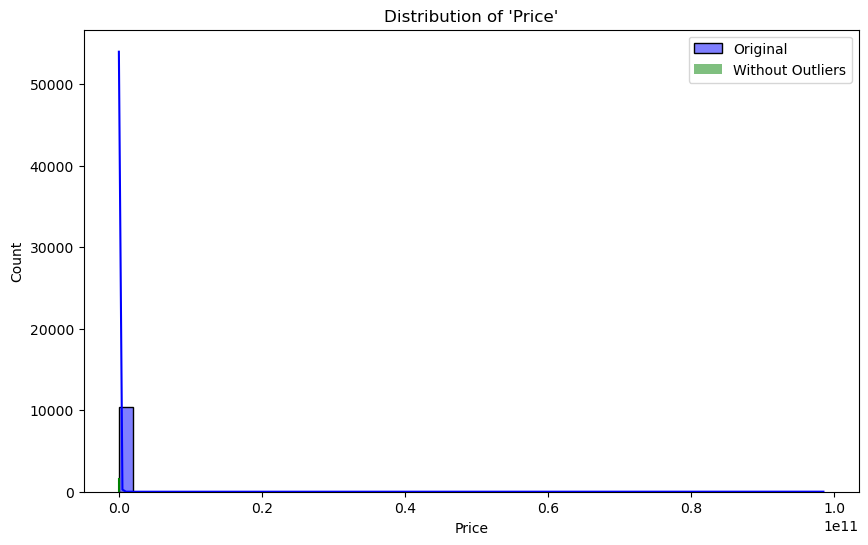

-------Calculated the range of your target variables-------

Target Range: 0.11315502915821836

-------Compared the MSE to the square of the range-------

Target Range: 0.11315502915821836
Target Range Squared: 0.012804060623797247

-------Print LinearRegression MSE and R2-------

LinearRegression MSE: 3125.649811377959, R²: -7094590.48627953

-------Print Decision Tree MSE and R2-------

Decision Tree MSE: 0.000822554890431066, R²: -0.7241106649091045

-------Print Random Forest MSE and R2-------

Random Forest MSE: 0.00044226290287602765, R²: 0.0729978066963779

-------Compared Target with LinearRegression MSE-------

LR_MSE is extremely large compared to the target variable range.

-------Compared Target with Decision Tree MSE-------

DT_MSE is within an acceptable range.

-------Compared Target with Random Forest MSE-------

RF_MSE is within an acceptable range.


In [31]:
#Predict the model without outliers

from IPython.display import display, HTML

display(HTML("<h1 style='text-align:center;'>Predicted the model without outliers</h1>"))

print("")

from sklearn.model_selection import train_test_split 
#Splits the dataset into training and testing subsets.

from sklearn.linear_model import LinearRegression
#A linear regression model from Scikit-learn to predict continuous values.

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
#Evaluates the model's error by calculating the average squared difference between predicted and actual values.
#Measures the proportion of variance in the target variable that the model explains (also known as the coefficient of determination).

from sklearn.preprocessing import StandardScaler

#load dataset
#file_path = r'C:\Users\Vedika Pawar\OneDrive\Desktop\Datasetforanalysis\crypto_trends_insights_2024.csv'

#df1 = pd.read_csv(file_path)

# Step 1: Data Cleaning
columns_to_drop = ['Name', 'Symbol', 'YTD %', 'Volume Change (30d)']
data_cleaned = df.drop(columns=columns_to_drop, axis=1).dropna()

# Step 2: Outlier Detection and Removal
Q1 = data_cleaned['Price'].quantile(0.25)
Q3 = data_cleaned['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data_cleaned[(data_cleaned['Price'] >= lower_bound) & (data_cleaned['Price'] <= upper_bound)]

# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Price'], bins=50, kde=True, color='blue', label='Original')
sns.histplot(data_no_outliers['Price'], bins=50, kde=True, color='green', label='Without Outliers')
plt.title("Distribution of 'Price'")
plt.legend()
plt.show()

# Step 3: Feature Scaling and Log Transformation
x = data_no_outliers.drop(['Price'], axis=1)
y = np.log1p(data_no_outliers['Price'])  # Log-transform the target variable

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
#train_test_split: Randomly splits the dataset into training and testing subsets.
#X_train and y_train: Training data (80% of the dataset, by default).
#X_test and y_test: Testing data (20% of the dataset, by default).
#Parameters:
#test_size=0.2: Specifies 20% of the data is used for testing.
#random_state=42: Ensures reproducibility of results by fixing the random seed.

# Initialize and train the model
model = LinearRegression() #Initialize Model (LinearRegression()): Creates an instance of the linear regression model.
model.fit(x_train, y_train) #Train Model (fit()): Fits the model to the training data by finding the best-fitting line that minimizes
#the error between predictions and actual values.

#Make Predictions
y_pred = model.predict(x_test) #predict(): Uses the trained model to predict Price for the unseen test data (X_test).

#Evaluate the Model
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

#Summary
#The extremely large MSE and negative R² indicate the model is performing poorly.
#Start by examining the data, scaling the features, and possibly transforming the target variable to improve results.

#Try Other Models:

#Linear regression might not be suitable if the relationship between features and Price is non-linear.
#Consider trying more complex models like decision trees, random forests, or gradient boosting.

#Calculate the range of your target variables
print("-------Calculated the range of your target variables-------")
print("")
target_range = y.max() - y.min()
print("Target Range:", target_range)

print("")

#Compare the MSE to the square of the range
print("-------Compared the MSE to the square of the range-------")
print("")
target_range = y.max() - y.min()
print("Target Range:", target_range)
print("Target Range Squared:", target_range**2)

print("")

# Results
print("-------Print LinearRegression MSE and R2-------")
print("")
print(f"LinearRegression MSE: {lr_mse}, R²: {lr_r2}")

# Step 5: Model Training and Evaluation
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
y_pred_dt_exp = np.expm1(y_pred_dt)
y_test_exp = np.expm1(y_test)
dt_mse = mean_squared_error(y_test_exp, y_pred_dt_exp)
dt_r2 = r2_score(y_test_exp, y_pred_dt_exp)

print("")

# Results
print("-------Print Decision Tree MSE and R2-------")
print("")
print(f"Decision Tree MSE: {dt_mse}, R²: {dt_r2}")

# Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf_exp = np.expm1(y_pred_rf)
rf_mse = mean_squared_error(y_test_exp, y_pred_rf_exp)
rf_r2 = r2_score(y_test_exp, y_pred_rf_exp)

print("")

#Result
print("-------Print Random Forest MSE and R2-------")
print("")
print(f"Random Forest MSE: {rf_mse}, R²: {rf_r2}")

print("")

#Compare Target with LinearRegression MSE
print("-------Compared Target with LinearRegression MSE-------")
print("")
if lr_mse > target_range**2:
    print("LR_MSE is extremely large compared to the target variable range.")
else:
    print("LR_MSE is within an acceptable range.")

print("")

#Compare Target with Decision Tree MSE
print("-------Compared Target with Decision Tree MSE-------")
print("")
if dt_mse > target_range**2:
    print("DT_MSE is extremely large compared to the target variable range.")
else:
    print("DT_MSE is within an acceptable range.")

print("")

#Compare Target with Random Forest MSE
print("-------Compared Target with Random Forest MSE-------")
print("")
if rf_mse > target_range**2:
    print("RF_MSE is extremely large compared to the target variable range.")
else:
    print("RF_MSE is within an acceptable range.")


Conclusion:
Linear Regression performs very poorly, with an excessively large MSE and negative R², indicating it is not suitable for this prediction task.
Decision Tree and Random Forest both have MSE values within an acceptable range, but their R² values suggest they do not fully capture the underlying patterns of the data. Random Forest, however, is the best performer out of the three models, though there is still room for improvement in model tuning and selection.

In [33]:
#Model Tunning and Selection with outliers

from IPython.display import display, HTML

display(HTML("<h1 style='text-align:center;'>Model Tunning and Selection with outliers</h1>"))

print("")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 1: Data Cleaning
columns_to_drop = ['Name', 'Symbol', 'YTD %', 'Volume Change (30d)']
data_cleaned4 = df.drop(columns=columns_to_drop, axis=1).dropna()

# Step 2: Feature Scaling and Log Transformation
x = data_cleaned4.drop(['Price'], axis=1)
y = np.log1p(data_cleaned4['Price'])  # Log-transform the target variable

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split into Train/Test for evaluation
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.5, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Hyperparameter tuning for Decision Tree and Random Forest without cross-validation
tuned_models = {}
for name, model in models.items():
    if name == "Decision Tree":
        # Manual hyperparameter tuning
        best_mse = float("inf")
        best_params = None
        for max_depth in [None, 10, 20]:
            for min_samples_split in [2, 5]:
                for min_samples_leaf in [1, 2]:
                    tuned_model = DecisionTreeRegressor(
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        random_state=42
                    )
                    tuned_model.fit(X_train, y_train)
                    y_pred = tuned_model.predict(X_test)
                    mse = mean_squared_error(y_test, y_pred)
                    if mse < best_mse:
                        best_mse = mse
                        best_params = {
                            "max_depth": max_depth,
                            "min_samples_split": min_samples_split,
                            "min_samples_leaf": min_samples_leaf
                        }
        tuned_models[name] = (best_mse, best_params)

    elif name == "Random Forest":
        # Manual hyperparameter tuning
        best_mse = float("inf")
        best_params = None
        for n_estimators in [50, 100]:
            for max_depth in [None, 10]:
                for min_samples_split in [2, 5]:
                    for min_samples_leaf in [1, 2]:
                        tuned_model = RandomForestRegressor(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        tuned_model.fit(X_train, y_train)
                        y_pred = tuned_model.predict(X_test)
                        mse = mean_squared_error(y_test, y_pred)
                        if mse < best_mse:
                            best_mse = mse
                            best_params = {
                                "n_estimators": n_estimators,
                                "max_depth": max_depth,
                                "min_samples_split": min_samples_split,
                                "min_samples_leaf": min_samples_leaf
                            }
        tuned_models[name] = (best_mse, best_params)

    else:
        # Direct training for Linear Regression
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        tuned_models[name] = (mse, "N/A")

# Display results
for model_name, (mse, params) in tuned_models.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  Best Parameters: {params}")
    print("-" * 40)

# Select the best model
best_model_name = min(tuned_models, key=lambda x: tuned_models[x][0])
print(f"Best Model: {best_model_name} with MSE = {tuned_models[best_model_name][0]}")


Linear Regression:
  Mean Squared Error: 8929133.356624378
  Best Parameters: N/A
----------------------------------------
Decision Tree:
  Mean Squared Error: 1.4489469885529205
  Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}
----------------------------------------
Random Forest:
  Mean Squared Error: 1.0713432650587424
  Best Parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}
----------------------------------------
Best Model: Random Forest with MSE = 1.0713432650587424


In [35]:
#Model Tunning and Selection without outliers

from IPython.display import display, HTML

display(HTML("<h1 style='text-align:center;'>Model Tunning and Selection without outliers</h1>"))

print("")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 1: Data Cleaning
columns_to_drop = ['Name', 'Symbol', 'YTD %', 'Volume Change (30d)']
data_cleaned5 = df.drop(columns=columns_to_drop, axis=1).dropna()

# Step 2: Outlier Detection and Removal
Q1 = data_cleaned5['Price'].quantile(0.25)
Q3 = data_cleaned5['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers = data_cleaned5[(data_cleaned5['Price'] >= lower_bound) & (data_cleaned5['Price'] <= upper_bound)]

# Step 2: Feature Scaling and Log Transformation
x = data_no_outliers.drop(['Price'], axis=1)
y = np.log1p(data_no_outliers['Price'])  # Log-transform the target variable

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split into Train/Test for evaluation
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.5, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Hyperparameter tuning for Decision Tree and Random Forest without cross-validation
tuned_models = {}
for name, model in models.items():
    if name == "Decision Tree":
        # Manual hyperparameter tuning
        best_mse = float("inf")
        best_params = None
        for max_depth in [None, 10, 20]:
            for min_samples_split in [2, 5]:
                for min_samples_leaf in [1, 2]:
                    tuned_model = DecisionTreeRegressor(
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        random_state=42
                    )
                    tuned_model.fit(X_train, y_train)
                    y_pred = tuned_model.predict(X_test)
                    mse = mean_squared_error(y_test, y_pred)
                    if mse < best_mse:
                        best_mse = mse
                        best_params = {
                            "max_depth": max_depth,
                            "min_samples_split": min_samples_split,
                            "min_samples_leaf": min_samples_leaf
                        }
        tuned_models[name] = (best_mse, best_params)

    elif name == "Random Forest":
        # Manual hyperparameter tuning
        best_mse = float("inf")
        best_params = None
        for n_estimators in [50, 100]:
            for max_depth in [None, 10]:
                for min_samples_split in [2, 5]:
                    for min_samples_leaf in [1, 2]:
                        tuned_model = RandomForestRegressor(
                            n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        tuned_model.fit(X_train, y_train)
                        y_pred = tuned_model.predict(X_test)
                        mse = mean_squared_error(y_test, y_pred)
                        if mse < best_mse:
                            best_mse = mse
                            best_params = {
                                "n_estimators": n_estimators,
                                "max_depth": max_depth,
                                "min_samples_split": min_samples_split,
                                "min_samples_leaf": min_samples_leaf
                            }
        tuned_models[name] = (best_mse, best_params)

    else:
        # Direct training for Linear Regression
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        tuned_models[name] = (mse, "N/A")

# Display results
for model_name, (mse, params) in tuned_models.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {mse}")
    print(f"  Best Parameters: {params}")
    print("-" * 40)

# Select the best model
best_model_name = min(tuned_models, key=lambda x: tuned_models[x][0])
print(f"Best Model: {best_model_name} with MSE = {tuned_models[best_model_name][0]}")


Linear Regression:
  Mean Squared Error: 991702583.669454
  Best Parameters: N/A
----------------------------------------
Decision Tree:
  Mean Squared Error: 0.0005306728657433854
  Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}
----------------------------------------
Random Forest:
  Mean Squared Error: 0.0003766372551917141
  Best Parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2}
----------------------------------------
Best Model: Random Forest with MSE = 0.0003766372551917141


In [39]:
#Model selection without any tunning or removing outliers

from IPython.display import display, HTML

display(HTML("<h1 style='text-align:center;'>Model selection without any tunning or removing outliers</h1>"))

print("")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop columns with 100% missing values or irrelevant features
data11 = df.drop(columns=['Name', 'Symbol', 'YTD %', 'Volume Change (30d)'])

# Define features and target
X = data11.drop(['Price'], axis=1)
y = np.log1p(data11['Price'])  # Log-transform the target variable

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}

# Display results
print("Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: RMSE = {metrics['RMSE']:.4f}, R2 = {metrics['R2']:.4f}")

# Select the best model
best_model_name = min(results, key=lambda x: results[x]['RMSE'])
print(f"Best Model: {best_model_name} with RMSE = {results[best_model_name]['RMSE']}")



Results:
Linear Regression: RMSE = 1.7538, R2 = -1.0192
Decision Tree: RMSE = 1.6002, R2 = -0.6810
Random Forest: RMSE = 1.1030, R2 = 0.2013
Best Model: Random Forest with RMSE = 1.1030217579183277
